In [1]:
from IPython.display import HTML, display, Image

# André: 	
"Para o artigo, a análise de sensibilidade certamente faz parte e pode até ocupar
um espaço importante. Mas não é a questão central. Ela responde quais variáveis
são relevantes, mas não conta uma história." 

- "Há alguma diferença entre o comportamento com vários issues e com um só? Quais
  diferenças? Como as opiniões são diferentes? Mais ou menos extremas? Mudanças
  mais ou menos rápidas (em tempo de simulação)? O número de estados finais
  parece ser o mesmo? As opiniões de um agente se concentram em uma região ou
  estão espalhadas?"
-  "Quanto a variação do modelo para os ps, que diferenças isso traz nas perguntas
  acima."


# Primeira parte da história:
O comportamento geral da simulação é o esperado para a regra de atualização: os agentes, no geral, ficam mais parecidos para simulações onde os intransigentes são uniformemente distribuidos no espaço de alternativas. Como a regra pode ser pensada como uma "assimilação enviesada",   $
    o_{i,k}(t+1) =
    p^{*}
    \frac{o_{i,k}(t) + o_{j,k}(t) }{2}
    +
    (1 - p^{*})
    o_{i,k}(t).
$ , como classificado por Flache et al 2017, há algum espaço para dispersão. Os histogramas com a medida do sistema, o desvio padrão das opiniões médias ($ \frac{\sum_{i = 1}^{n}x_i}{n}$), mostram essa tendência. Na condição inicial temos:


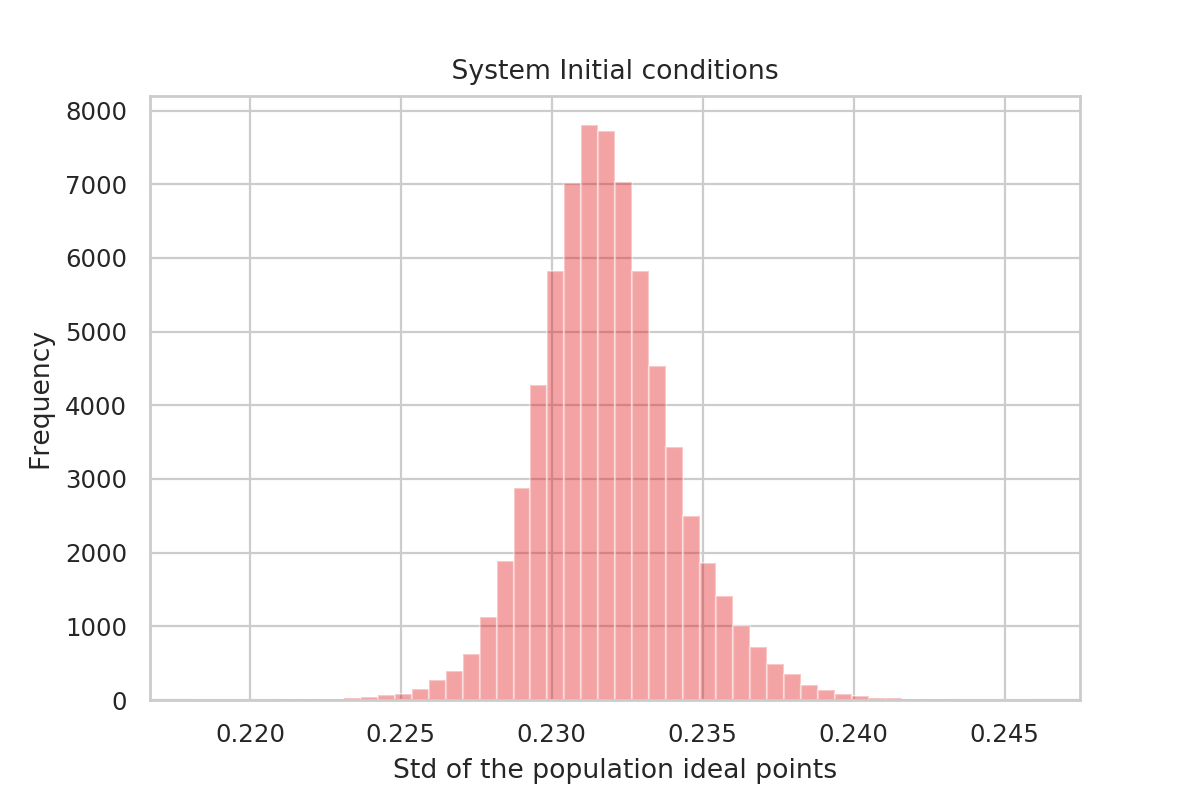

In [2]:
display(Image("initstd.png"))

Na regra de atualização testamos três "pstar" distintos:




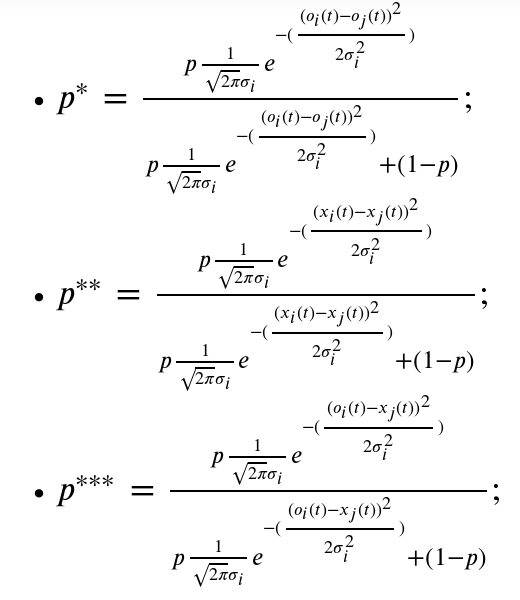

In [3]:
displayimages = lambda images: list(map(lambda x:display(Image(x)), images)) 
displayimages(["pstars.png"]);

Nos três casos ($p^{*}, p^{**}, p^{***}$) a simulação demonstra uma tendência geral assimilativa após 1.000.000 iterações:

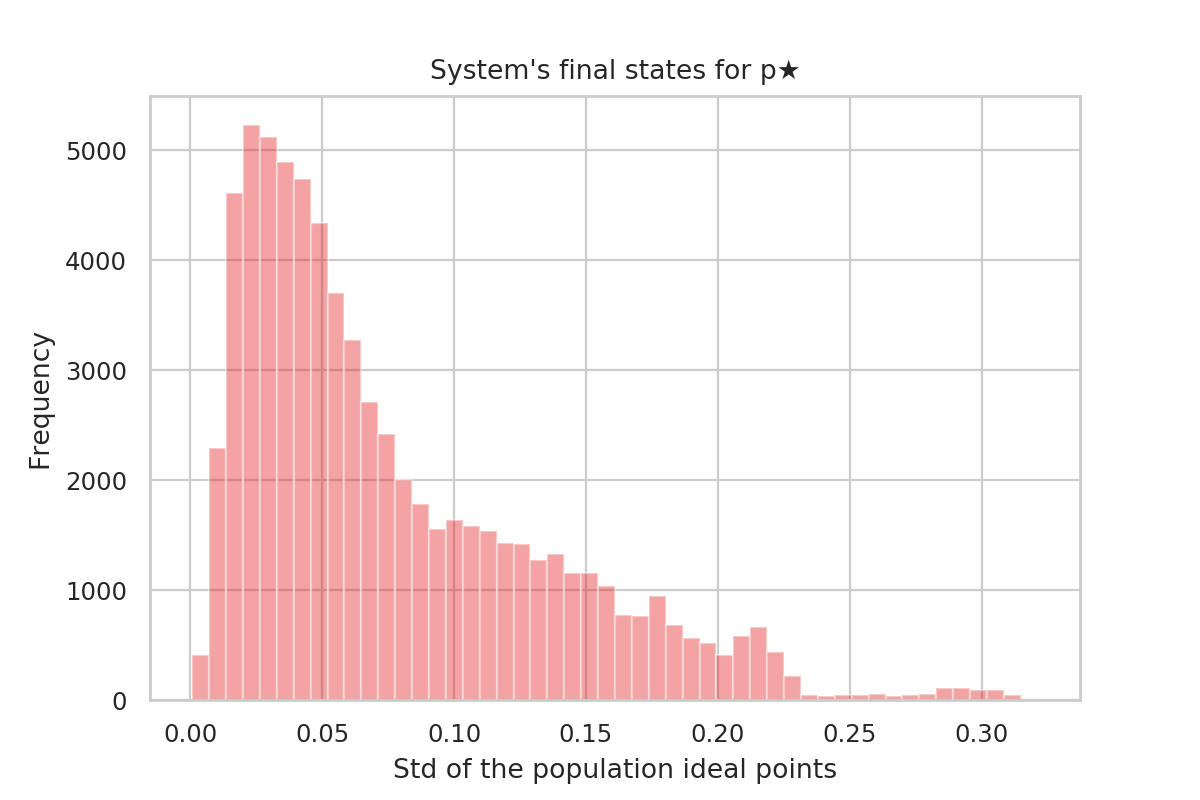

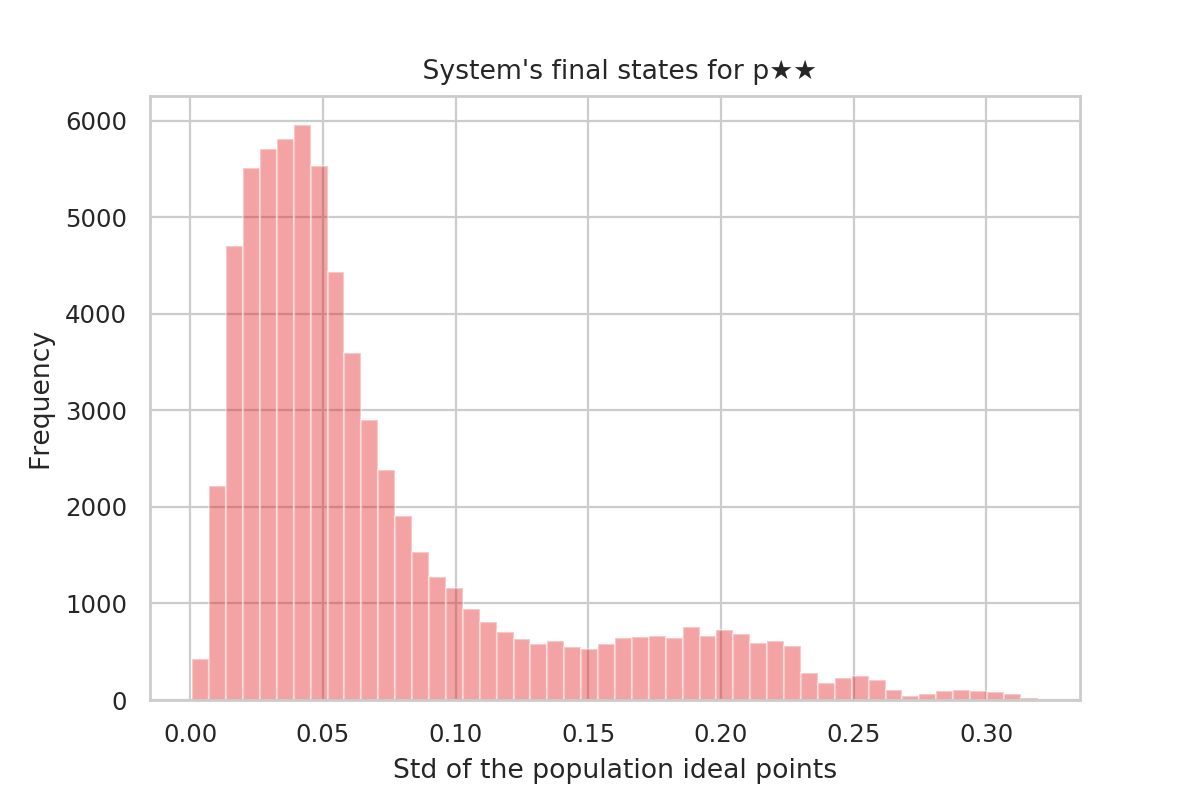

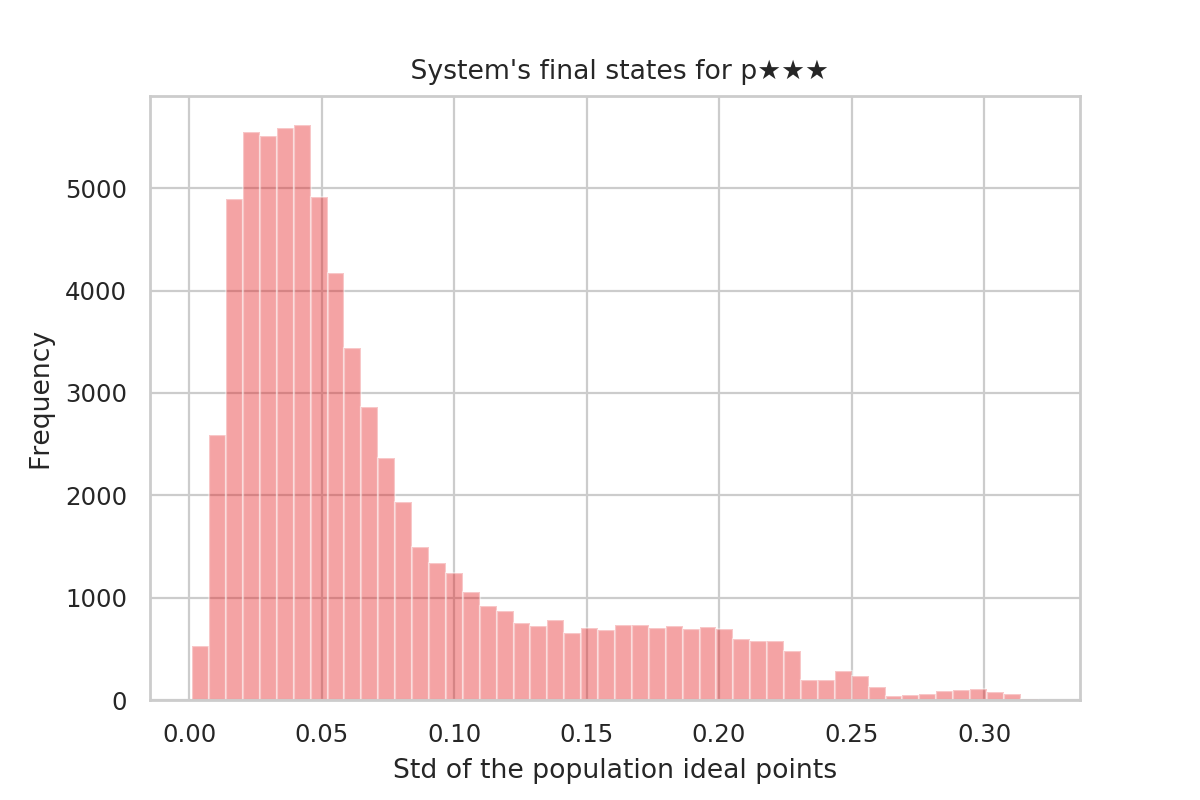

In [4]:

displayimages(["Ystd*.png", "Ystd**.png","Ystd***.png"]);

## "Há alguma diferença entre o comportamento com vários issues e com um só? "

Antes de tudo, quais os parâmetros da simulação? 



- A população de $500 < N < 5000 $ agentes;
- O número de questões $1 \leq \text{n} \leq 10 $; 

- As incertezas $0.01 \leq \sigma_i \leq 0.5 $;
  
  - Agentes intransigentes vão ter uma de suas opiniões com incerteza
    próxima a zero ($1e-20 $);
  

- O parâmetro de confiança $0.1 \leq p \leq 0.99 $;
  
- A proporção de agentes intransigentes $0.0 \leq (\text{p\_intran}) \leq 0.1 $;

- O parâmetro de reconsideração $0.0 < \rho  \leq 0.1 $, onde $\rho $ é o desvio
  padrão de uma Normal de média 0:
  
  - Isso significa que o ruído, $r$, é sorteado a partir de uma
    normal N(0,$\rho $), de forma que $o(t+1) = o(t) + r $;

  - Se $o(t) + r > 1$ então $o(t+1) = 1 $;
  - Se $o(t) + r < 0$ então $o(t+1) = 0 $.

A análise de sensitividade nos permite começar a responder a pergunta referente ao número de issues:

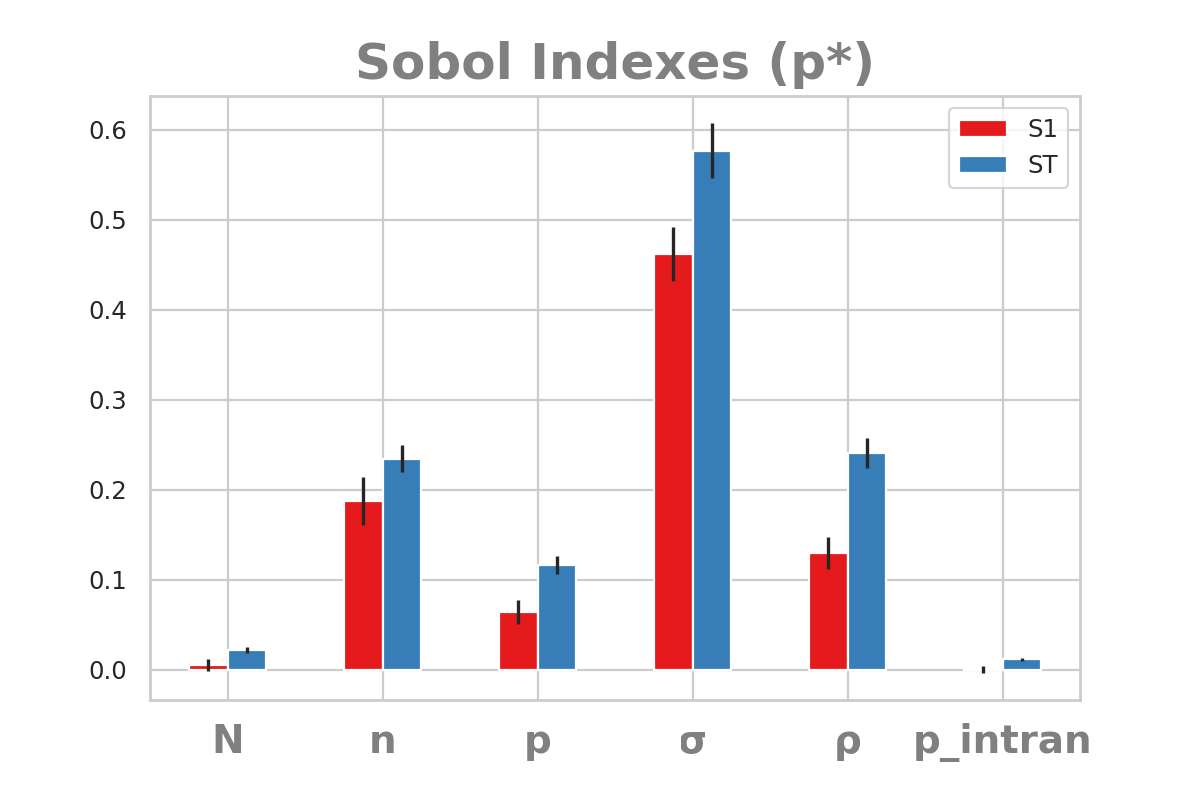

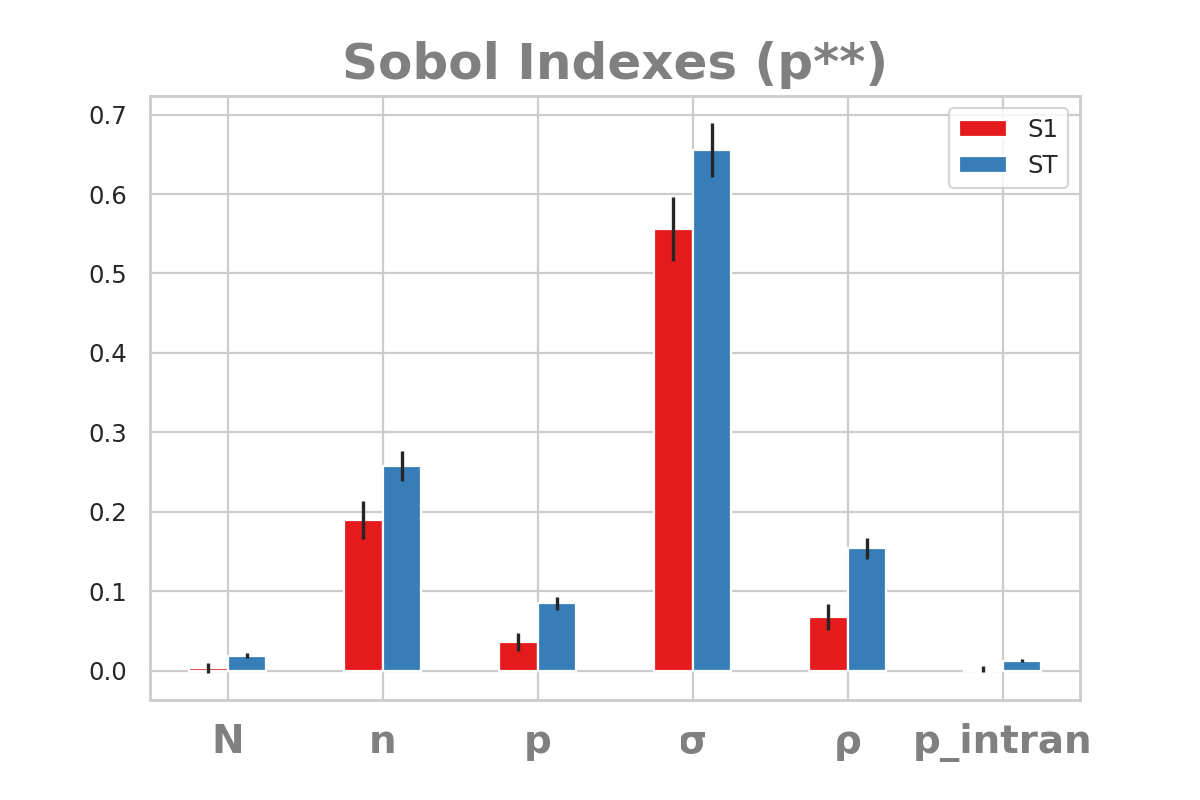

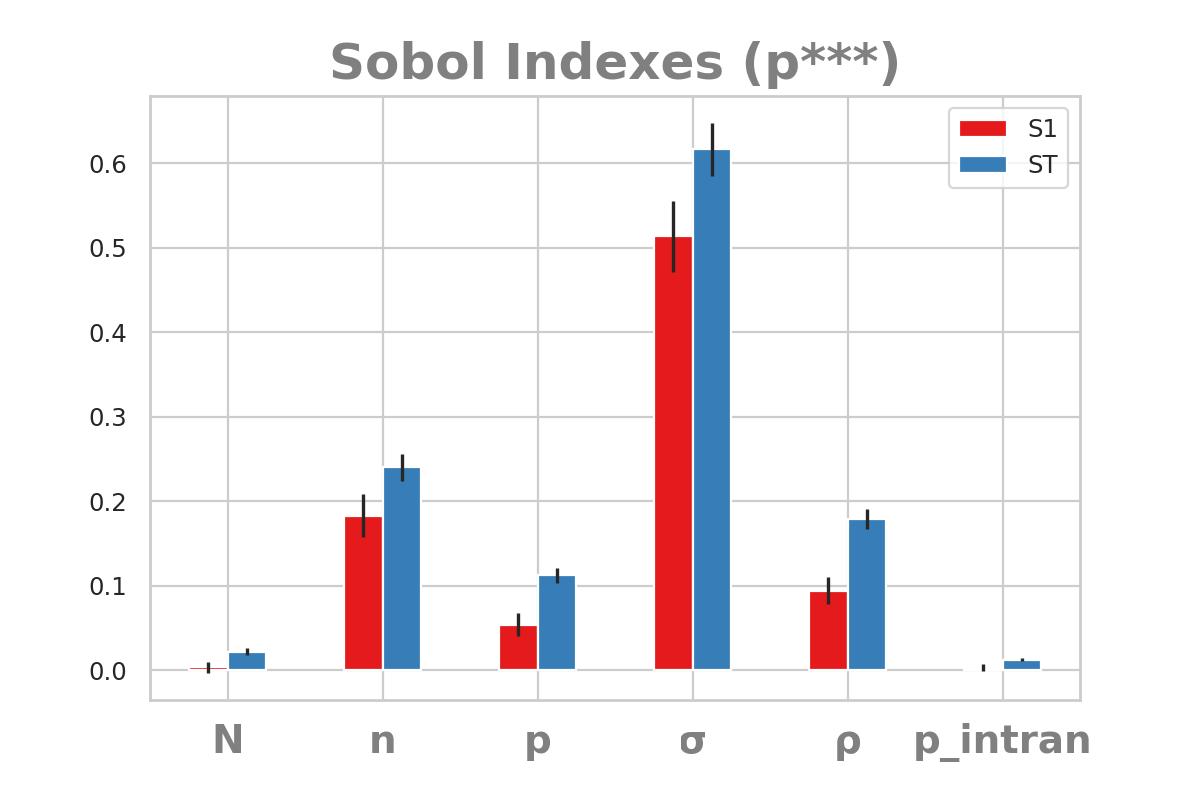

In [5]:
displayimages(["../img/sobolpstar{}.png".format(i) for i in range(1,4)]);

Os gráficos de barra dos índices de Sobol mostram que o parâmetro $n$ (número de questões) é o segundo mais importante na explicação da variação da medida do sistema então o número de questões é relevante. Da análise inferimos que os parâmetros $\sigma, n, \rho$ são os mais relevantes para compreender o comportamento do modelo __no intervalo definido de parâmetros__. Podemos ver que nos três casos o comportamento qualitativo do modelo é o mesmo, o que muda é o impacto quantitativo dos parâmetros (os gráficos a seguir confirmam isso). A análise de sensitividade não nos informa o formato do impacto desses parâmetros. Gráficos de dispersão o fazem: 

### Impacto do $\sigma$

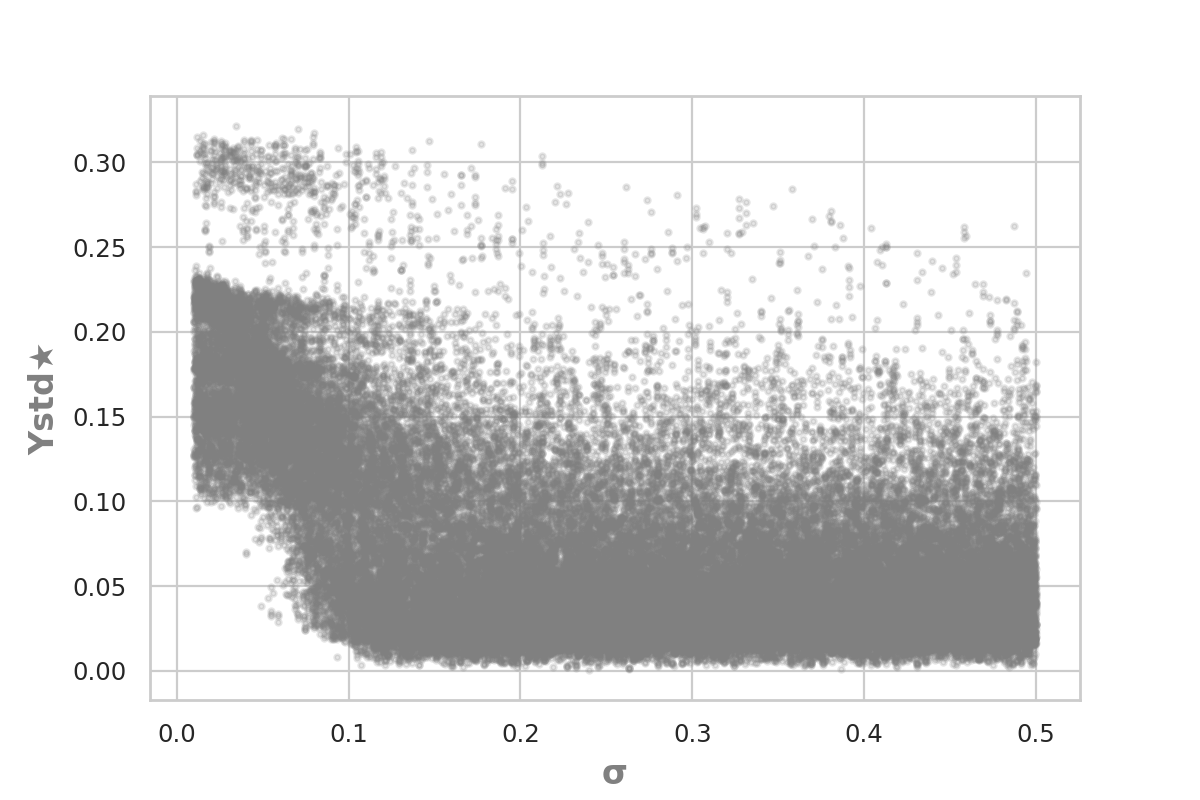

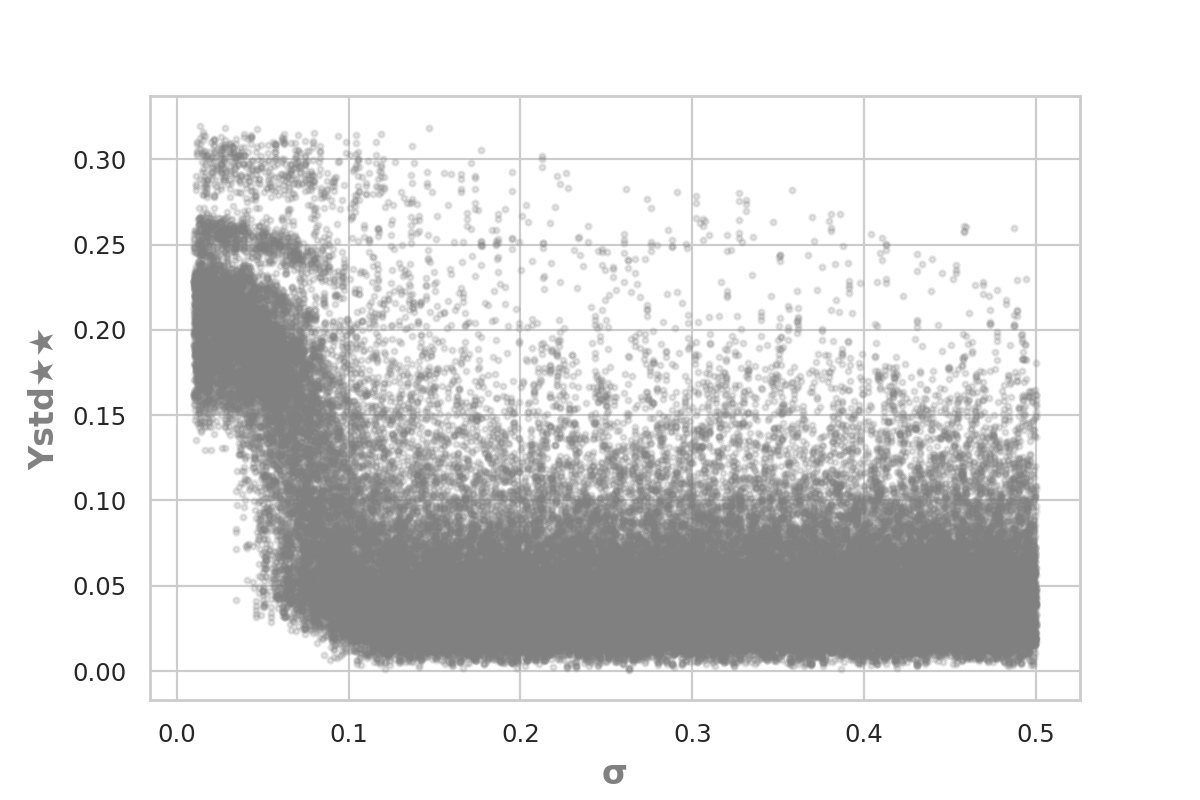

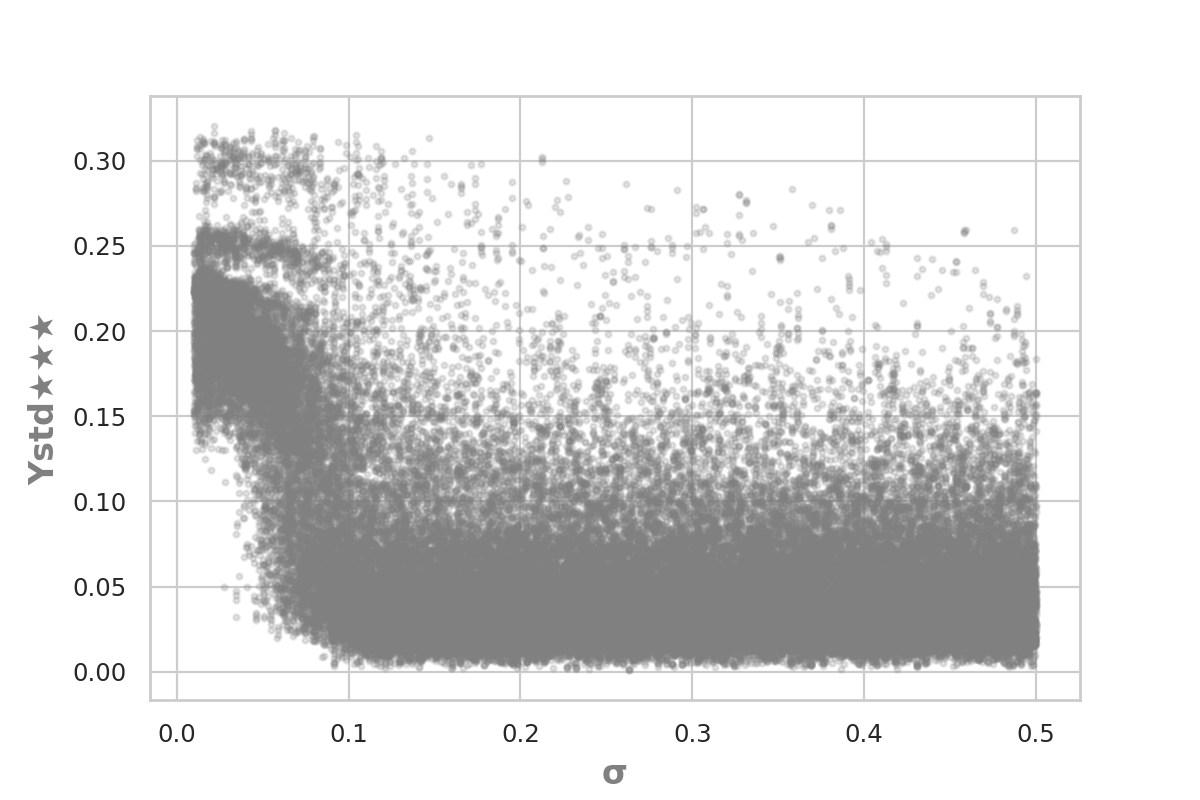

In [6]:
displayimages(["../img/regressionYstd{}σ.png".format(i) for i in  ["*","**","***"]]);

Os gráficos demonstram que $\sigma > 0.1$ passa a ter o mesmo efeito na medida do sistema, de forma que análises subsequentes nos restringimos a $[0.0, 0.1)$ Nesse intervalo, contudo, o parâmetro tem um efeito que vale ser investigado com mais cuidado. A direção do impacto é a esperada pela regra de atualização: quanto maior o $\sigma$ menor a dispersão.

### Impacto do $n$

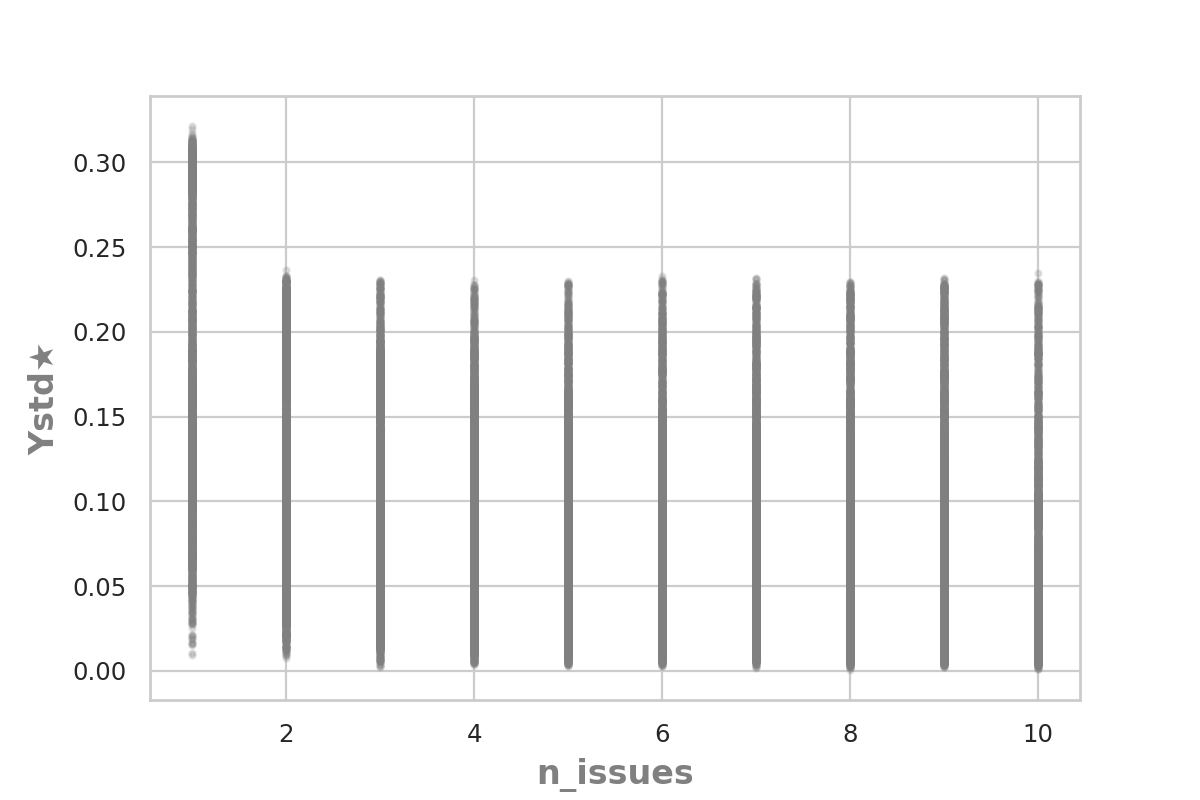

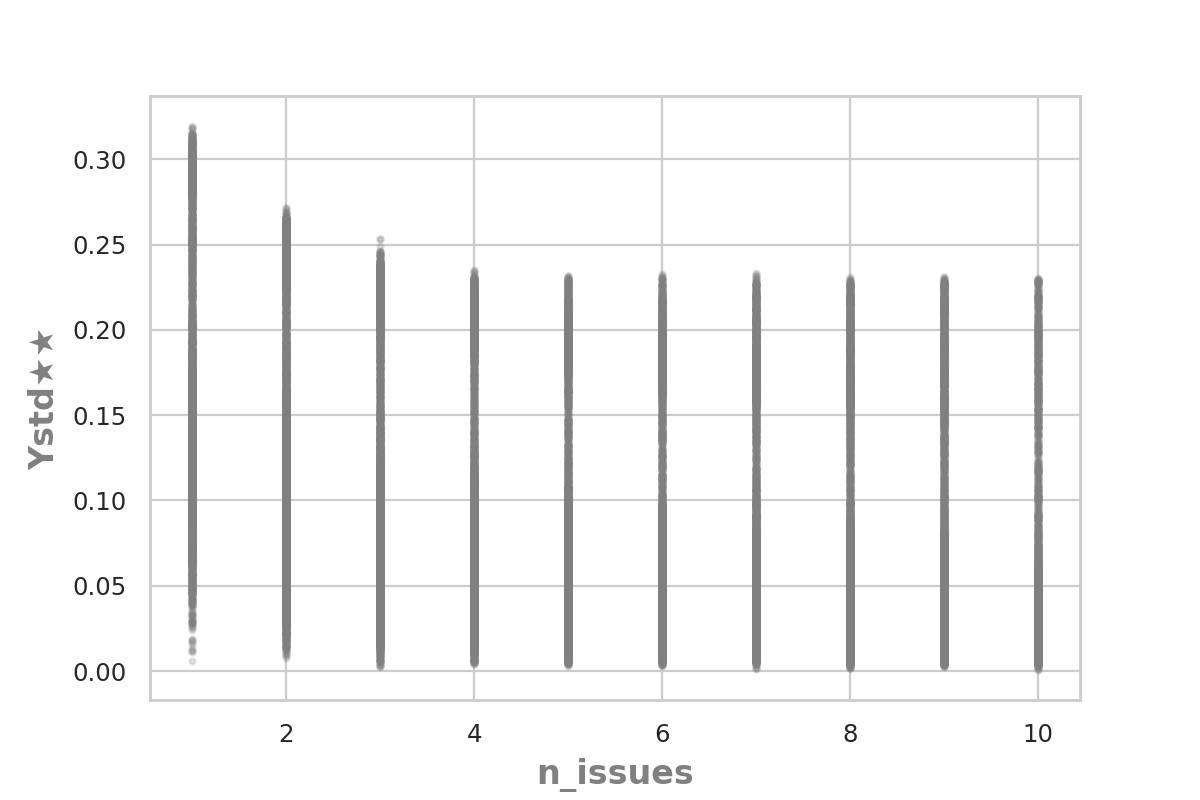

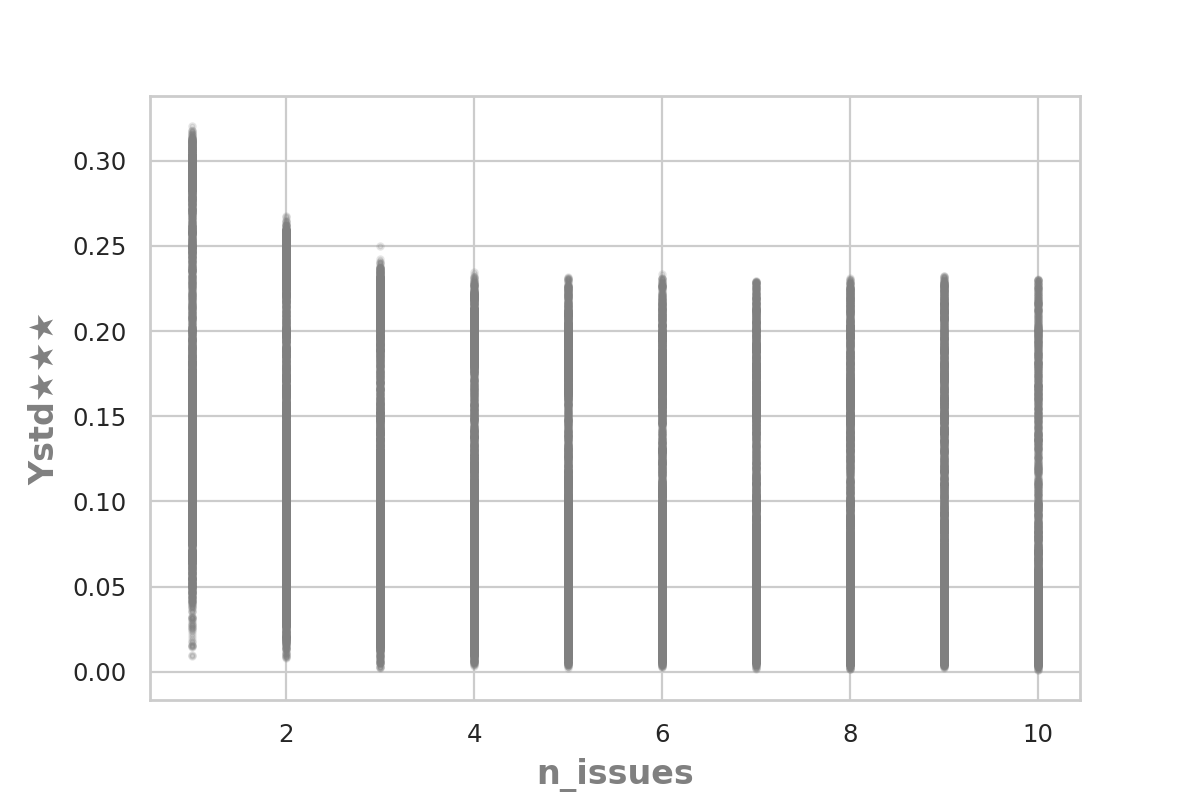

In [7]:
displayimages(["../img/regressionYstd{}n_issues.png".format(i) for i in  ["*","**","***"]] );

Nos três casos o número de questões (n ou n_issues) tem o mesmo impacto. E a partir de 5 questões o efeito do parâmetro é praticamente o mesmo, podemos, portanto, nos restringir a esse intervalo $[1,5]$. Um resultado contraintuitivo é que quanto maior o número de questões menor a dispersão. Vamos investigar isso melhor mais a frente.

### Impacto do $\rho$

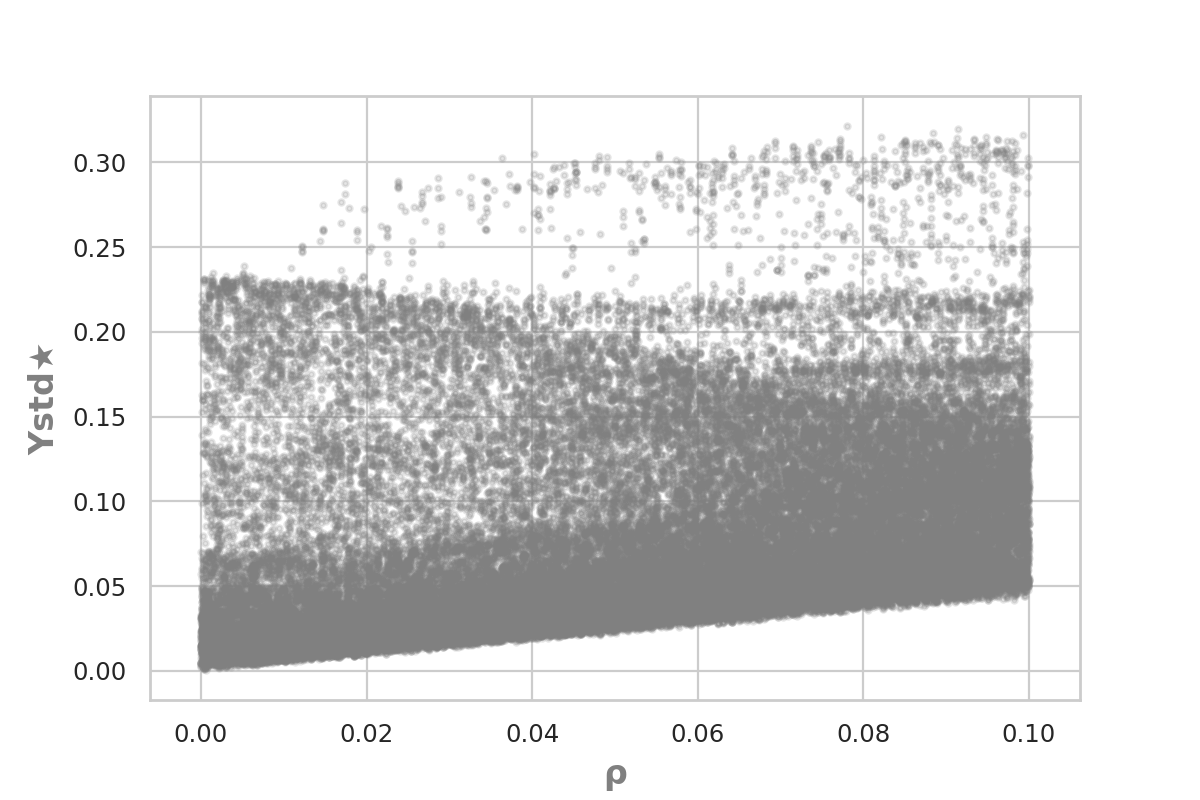

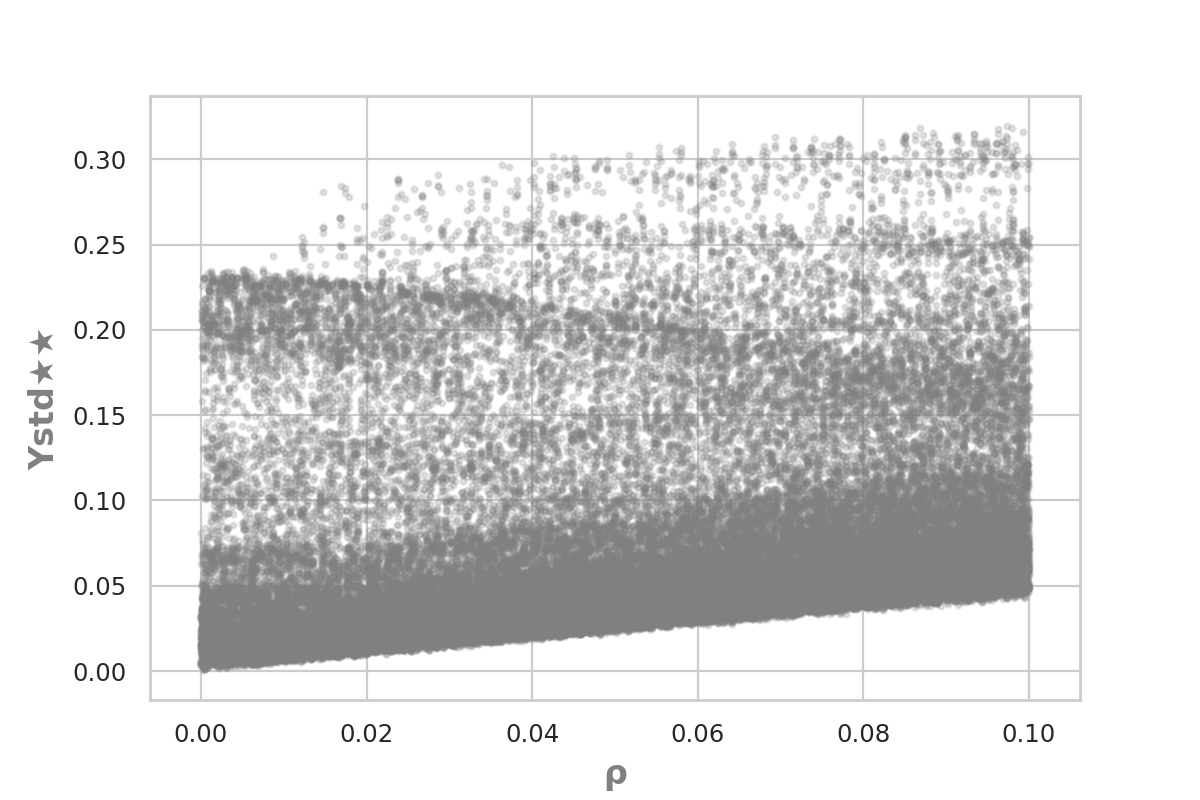

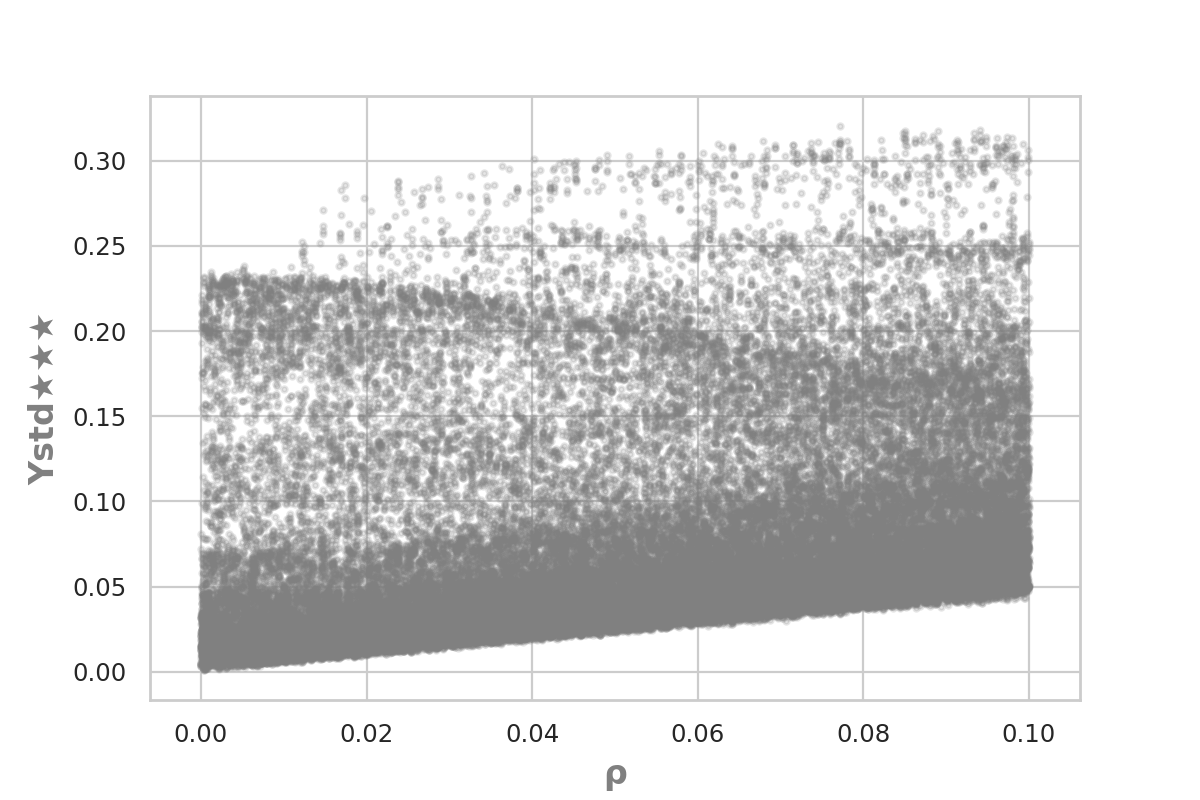

In [8]:
displayimages(["../img/regressionYstd{}ρ.png".format(i) for i in  ["*","**","***"]]);

O efeito de $\rho$ é o esperado também : quanto maior o ruído mais disperso o estado final do sistema. O caso de p*** é, contudo, o em que esse efeito é mais claro. Talvez valha a pena investigar isso melhor. 

Partamos então para uma investigação da interação entre $\sigma$ e $n$. Para isso fixamos os seguintes parâmetros: 

 - $\rho = 0.05$;
 - $N = 500$;
 - p_intran $ = 0.0$.

E rodamos a simulação por 500.000 iterações. Testamos combinações de $\sigma = (0.02, 0.04, 0.1)$ e de $ n = (1,5)$.

$\sigma$ imprime uma tendência central à dinâmica da simulação: quanto maior o $\sigma$ mais concentrados ao redor da média do intervalo os agentes vão ser. Contudo, quando o número de questões => $n=1$, essa tendência não é tão clara, pois o efeito do ruído faz com que eles sejam dispersos pelo espectro, mesmo que $\sigma$ tenha um impacto maior. Os gráficos abaixo deixam isso claro:

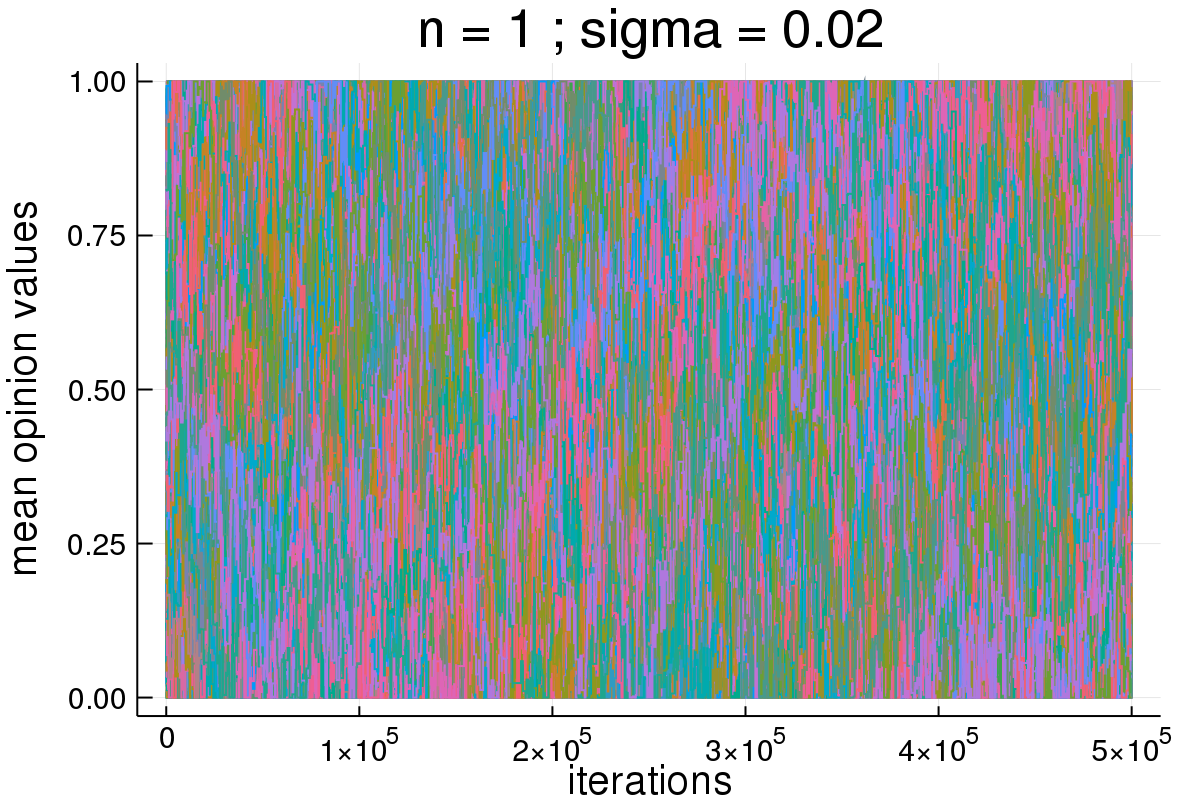

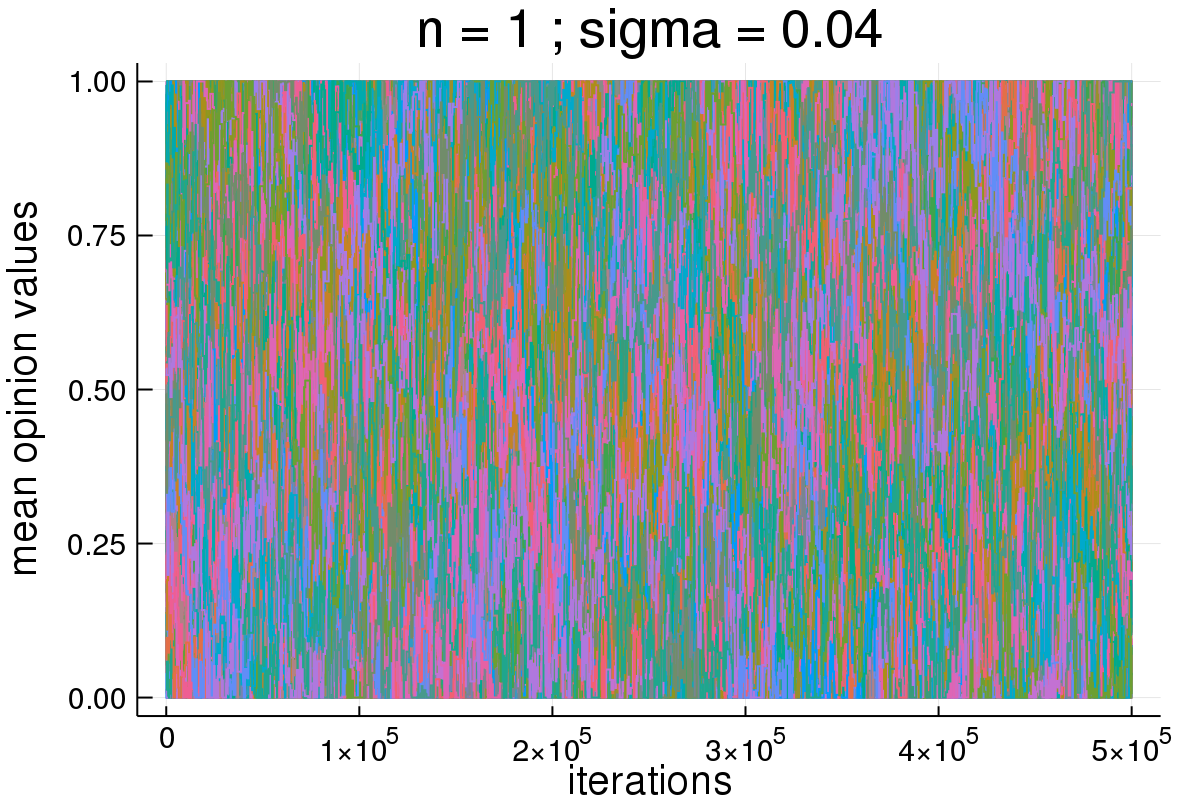

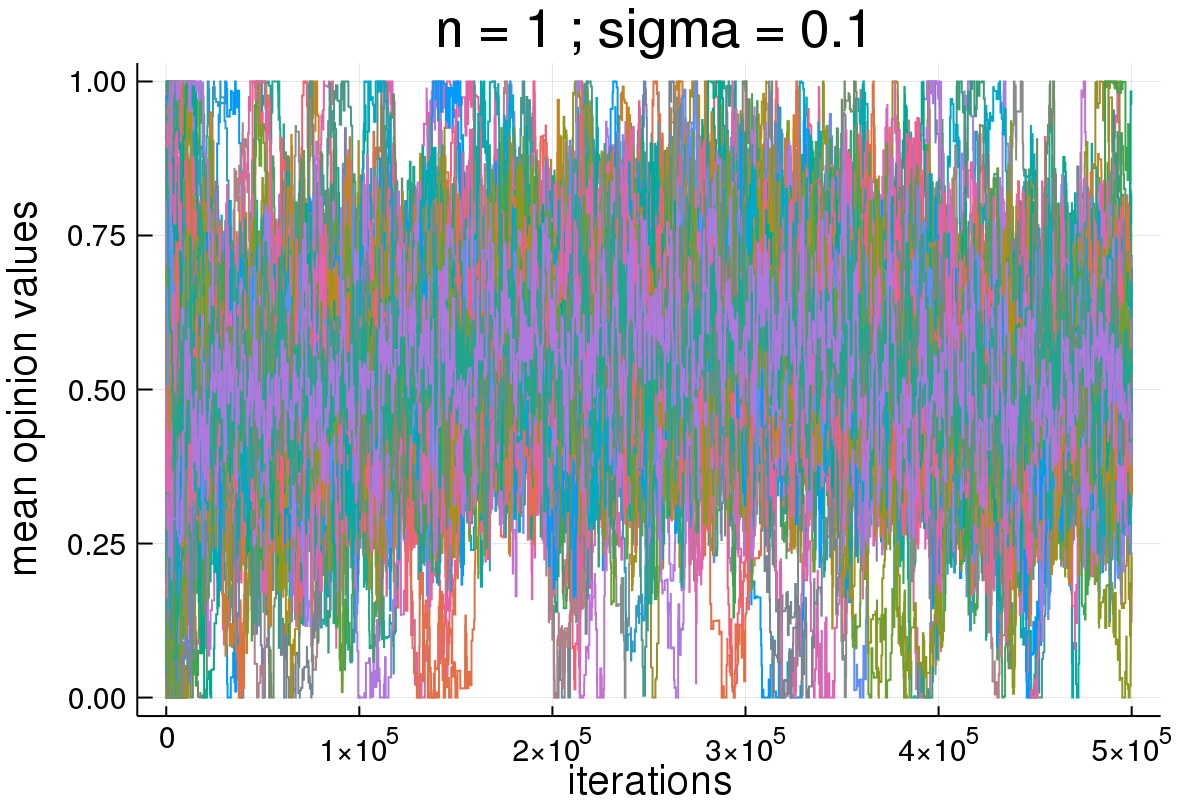

In [9]:
displayimages(["compare-ps/Poodl.calculatep★★★n1-rho0.05-sigma{}-0.0intrans.png".format(i) for i in  [0.02, 0.04, 0.1]]);

Quando aumentamos o valor de $n$ (para, digamos, 5) , contudo, o efeito centralizador de $\sigma$ torna-se mais forte:

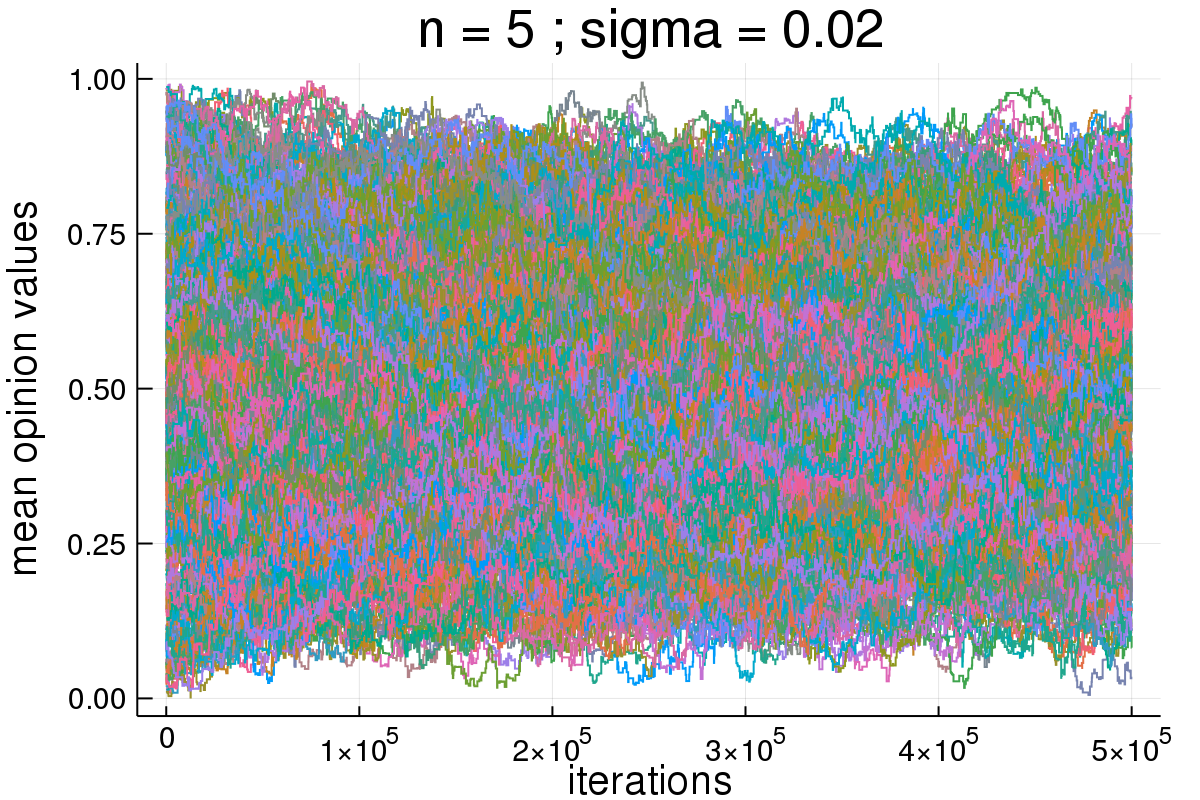

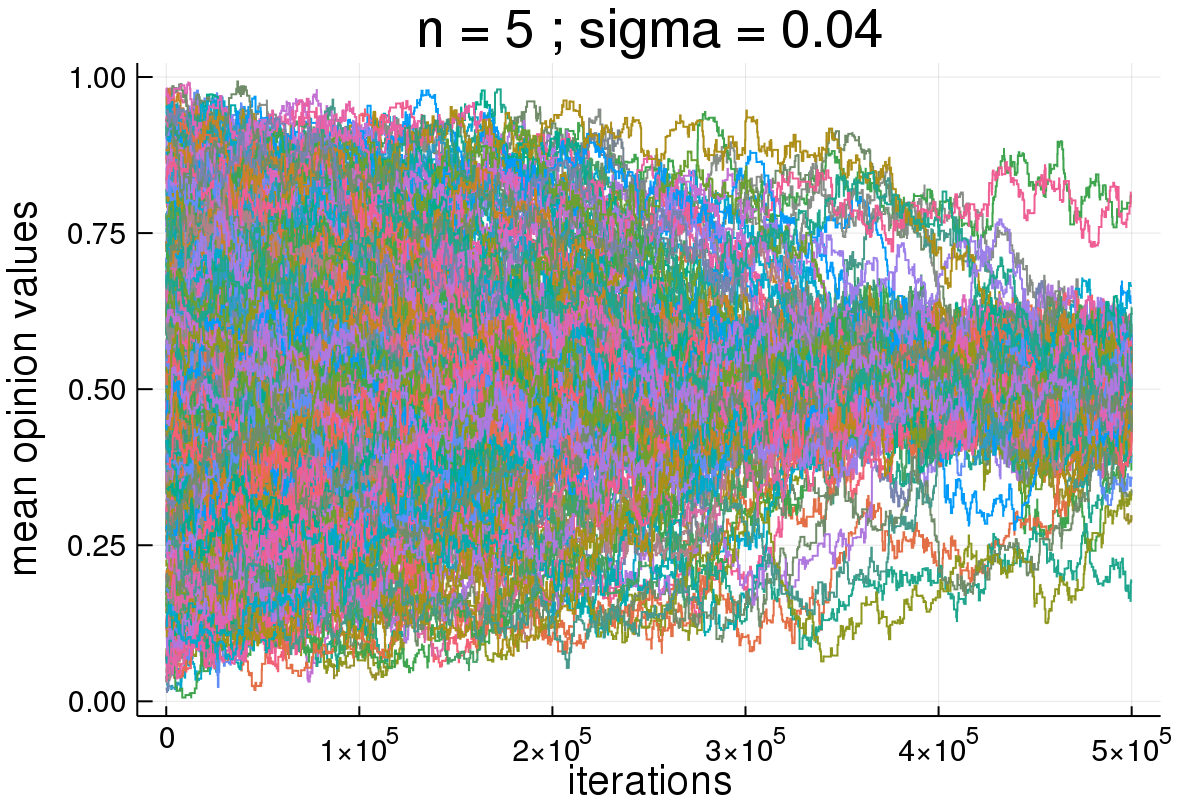

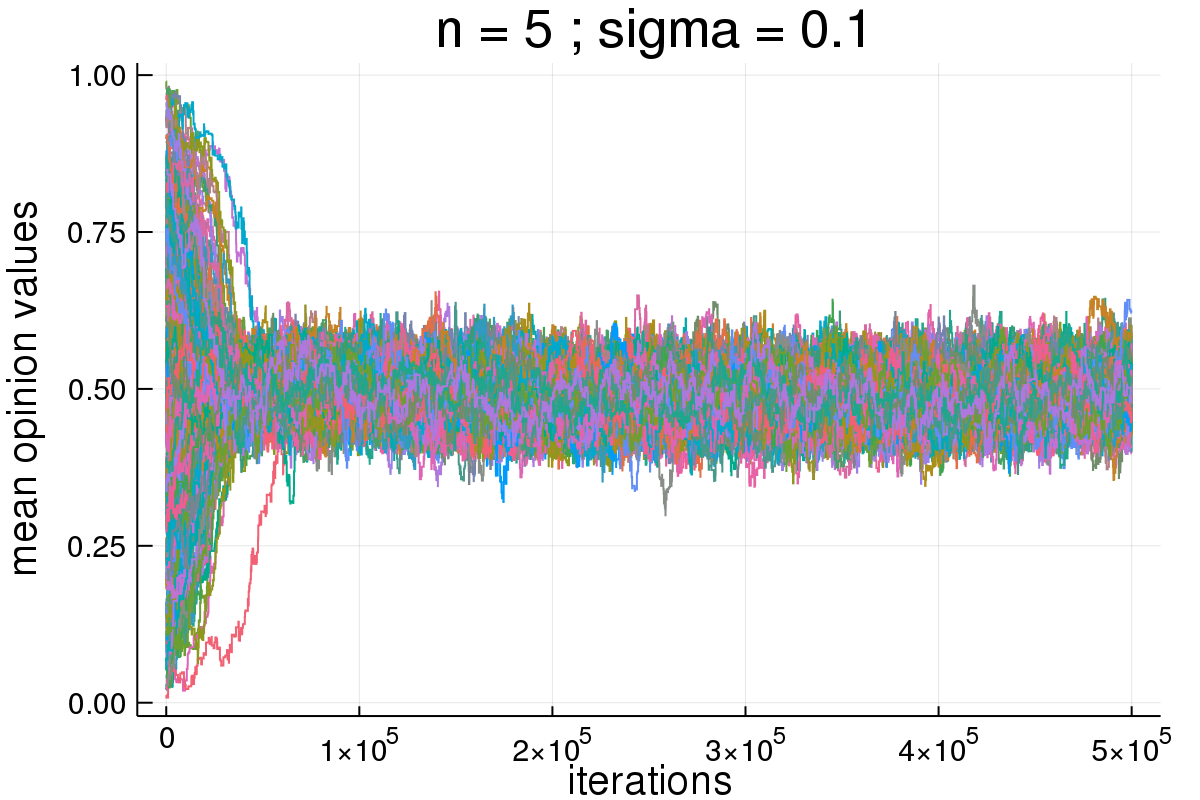

In [10]:
displayimages(["compare-ps/Poodl.calculatep★★★n5-rho0.05-sigma{}-0.0intrans.png".format(i) for i in  [0.02, 0.04, 0.1]]);

n = 1 => \rho = 0.1 ; se tivesse n = 4 => \rho comparavel deveria ser 0.2 para ser comparavel com o caso anterior; ver qual o ruído q tenho que implementar; 

A razão para isso é simples: como $x_i$ é a média das opiniões e $\rho$ só muda um dos $o_i$ por vez quanto maior o $n$ menor o impacto do $\rho$ na opinião média do agente, dado que ele vai ter um conjunto $n-1$ de outras opiniões centradas em algum ponto do espectro político, que por sua vez vão sendo afetadas pela interação com outros agentes. Como $\sigma$ é o parâmetro que domina a regra de atualização ele então interage com um $n$ maior, fortalecendo seu efeito.

Nas parametrizações acima o modelo tem ruído, mas o que acontece quando reduzimos o ruído para um valor baixo ($1e-5$)? A primeira diferença é que agora a população passa a convergir para determinados valores. No caso em que $\sigma = 0.1$ a tendência é convergir para valores próximos $0.5$.

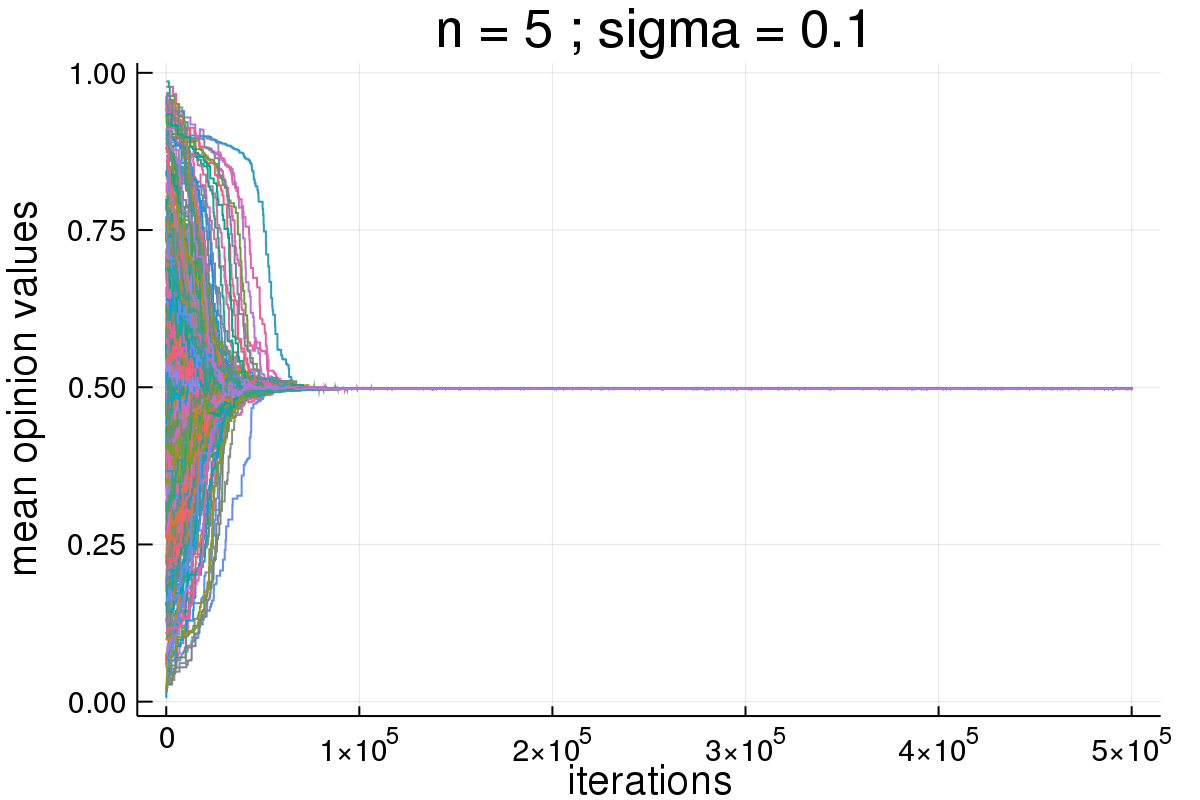

In [11]:
displayimages(["compare-ps/Poodl.calculatep★★★n5-rho1.0e-5-sigma0.1-0.0intrans.png"]);

## Diferença entre os casos 

Uma distinção interessante entre os casos nessa parametrização, $\sigma = 0.1$,  é que $p^{**}$ e $p^{***}$ sempre convergem para 0.5, independentemente de qual número de questões. Já $p^{*}$ o faz quando $n = 1 $ , mas quando $n = 5$ ou $10$ a tendência ao centro é mantida, mas surgem temos outros valores de convergência; e quanto maior o $n$ mais eles são(esse comportamento se mantêm com 1.000.000 iterações):

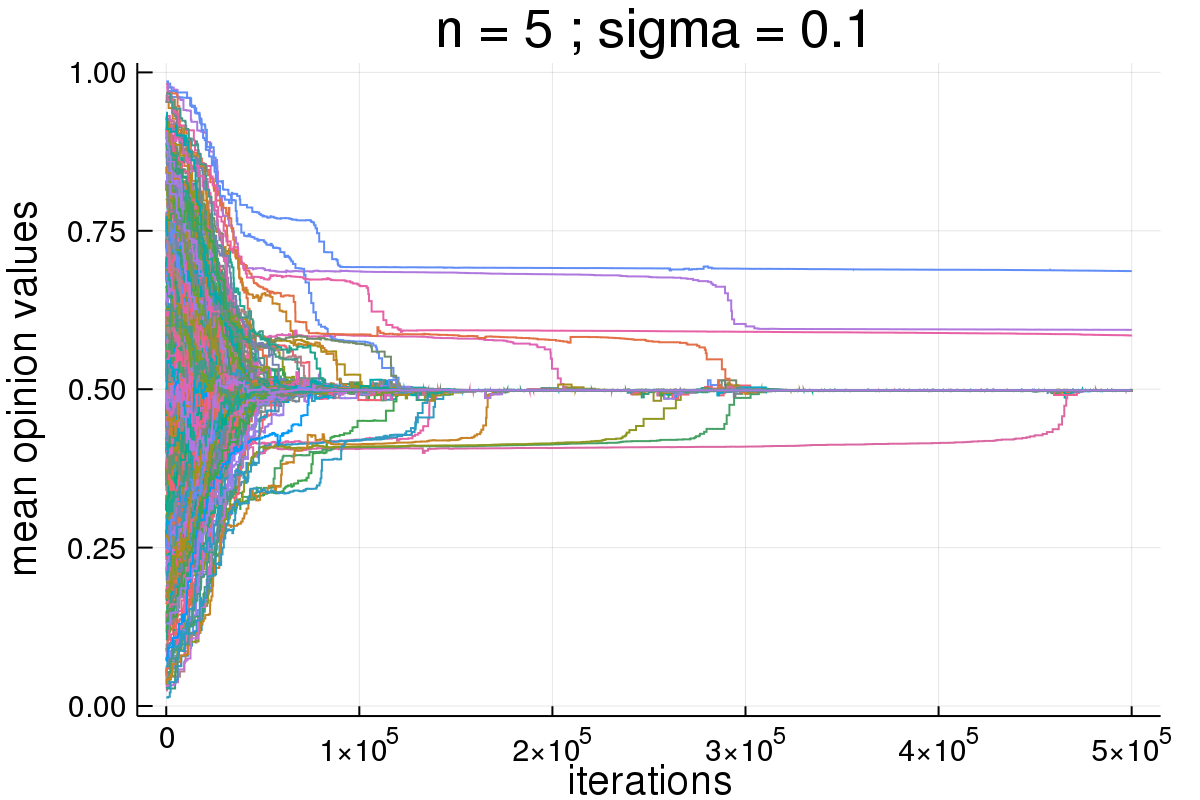

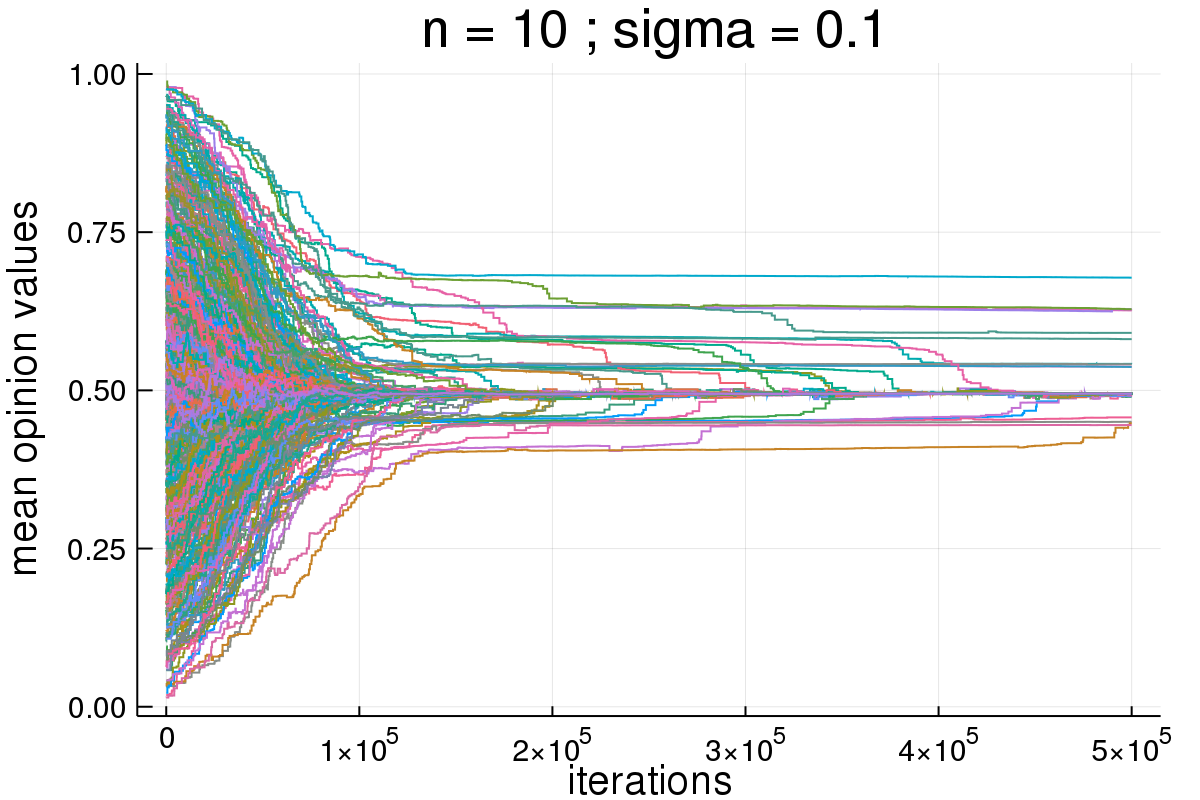

In [15]:
displayimages(["compare-ps/Poodl.calculatep★n5-rho1.0e-5-sigma0.1-0.0intrans.png",
              "compare-ps/Poodl.calculatep★n10-rho1.0e-5-sigma0.1-0.0intrans.png"]);

### depois explicar isso 

Nos casos em que $\sigma$ tem um valor intermediário no intervalo 0,1 , como 0.02 ou 0.04, há também uma diferença entre os casos: $p^*$ tem mais valores de convergência finais que $p^{**}$ e $p^{***}$. Nas imagens abaixo temos a diferença entre $p^{*}$ (primeiro gráfico) e $p^{***}$ (segundo gráfico) quando $\sigma = 0.02$:

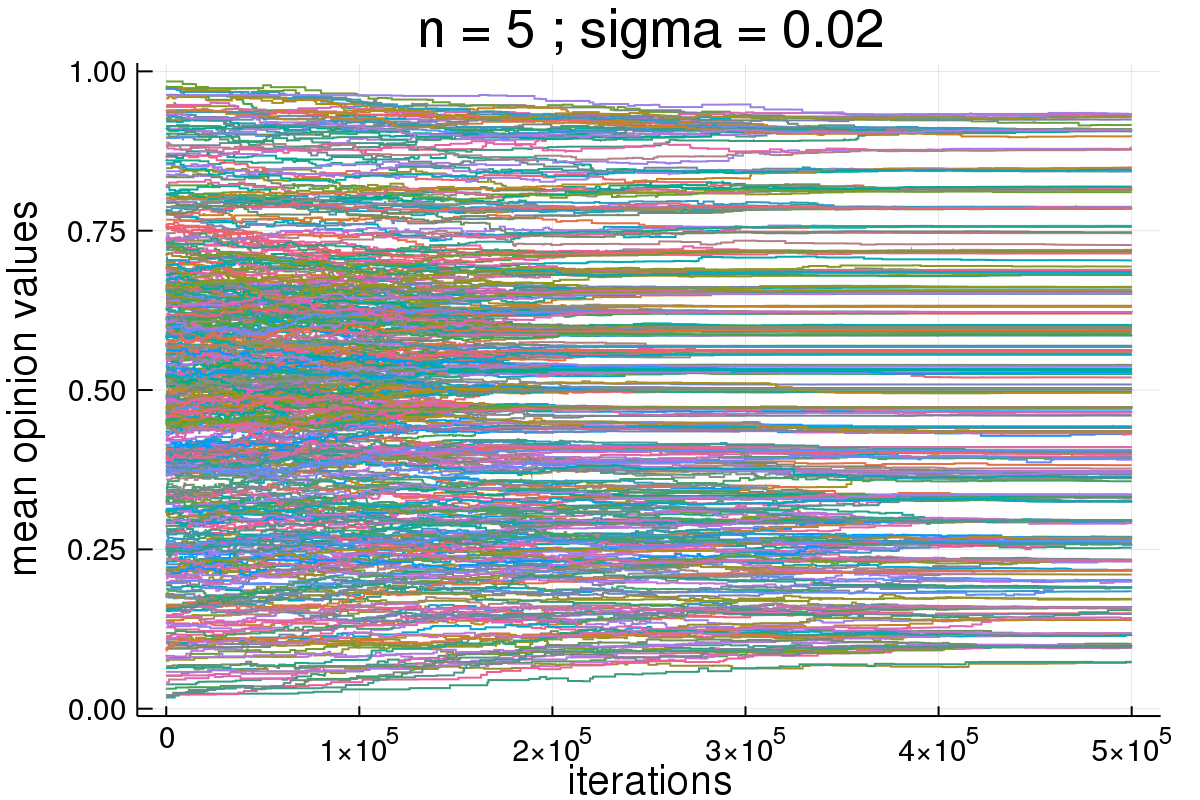

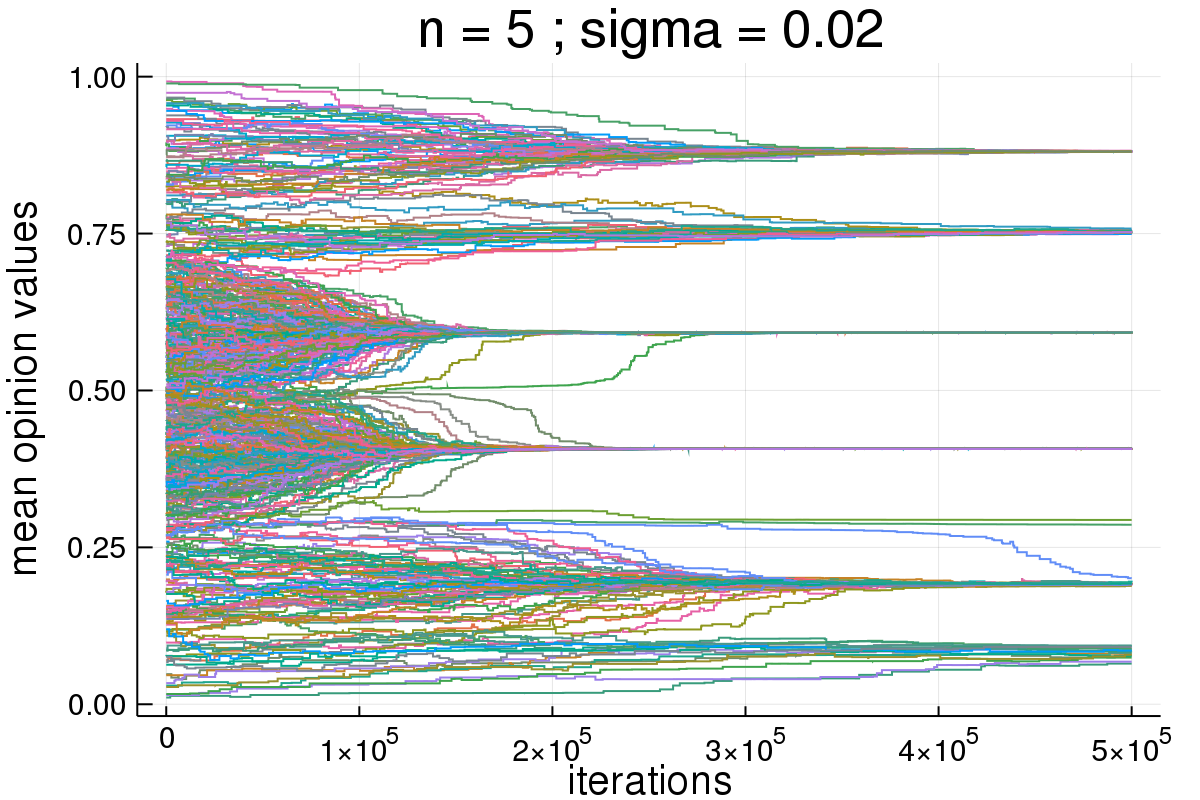

In [13]:
displayimages(["compare-ps/Poodl.calculatep★n5-rho1.0e-5-sigma0.02-0.0intrans.png",
              "compare-ps/Poodl.calculatep★★★n5-rho1.0e-5-sigma0.02-0.0intrans.png"]);

Esse comportamento é observado também com valores como 0.04 e 0.06. Abaixo os gráficos para $\sigma = 0.06$:

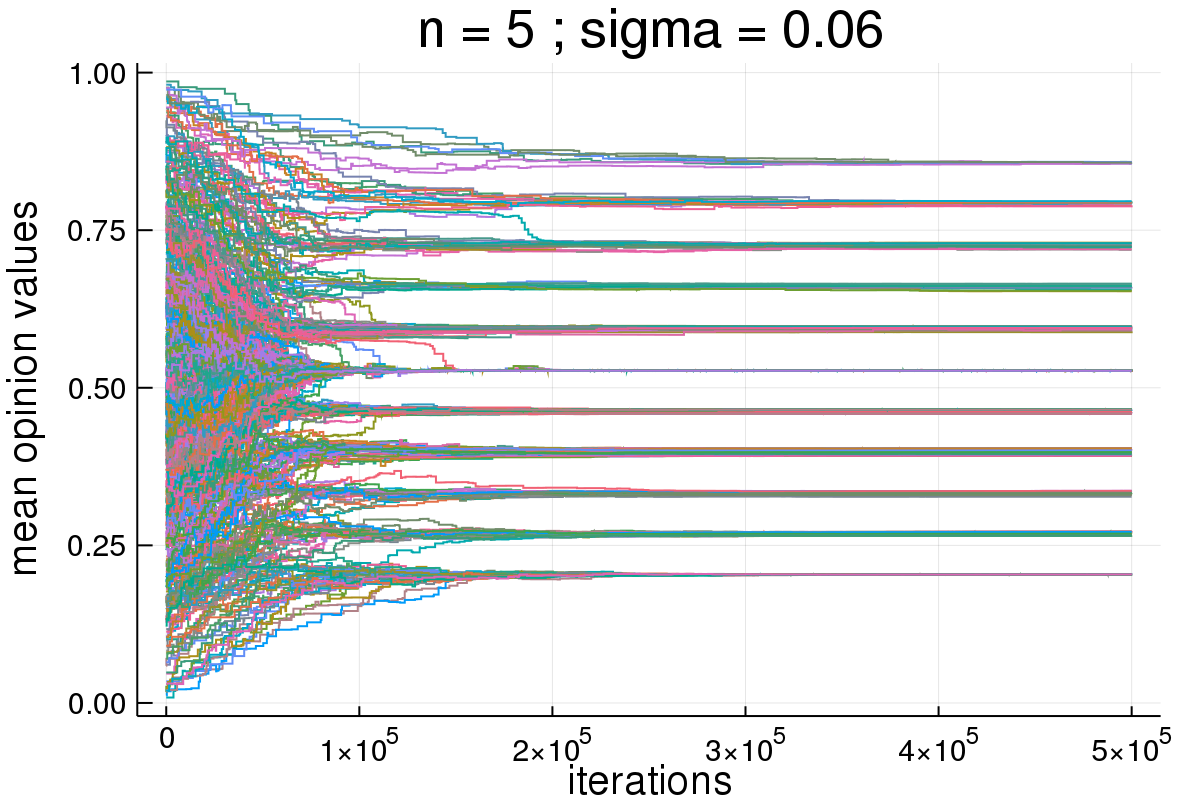

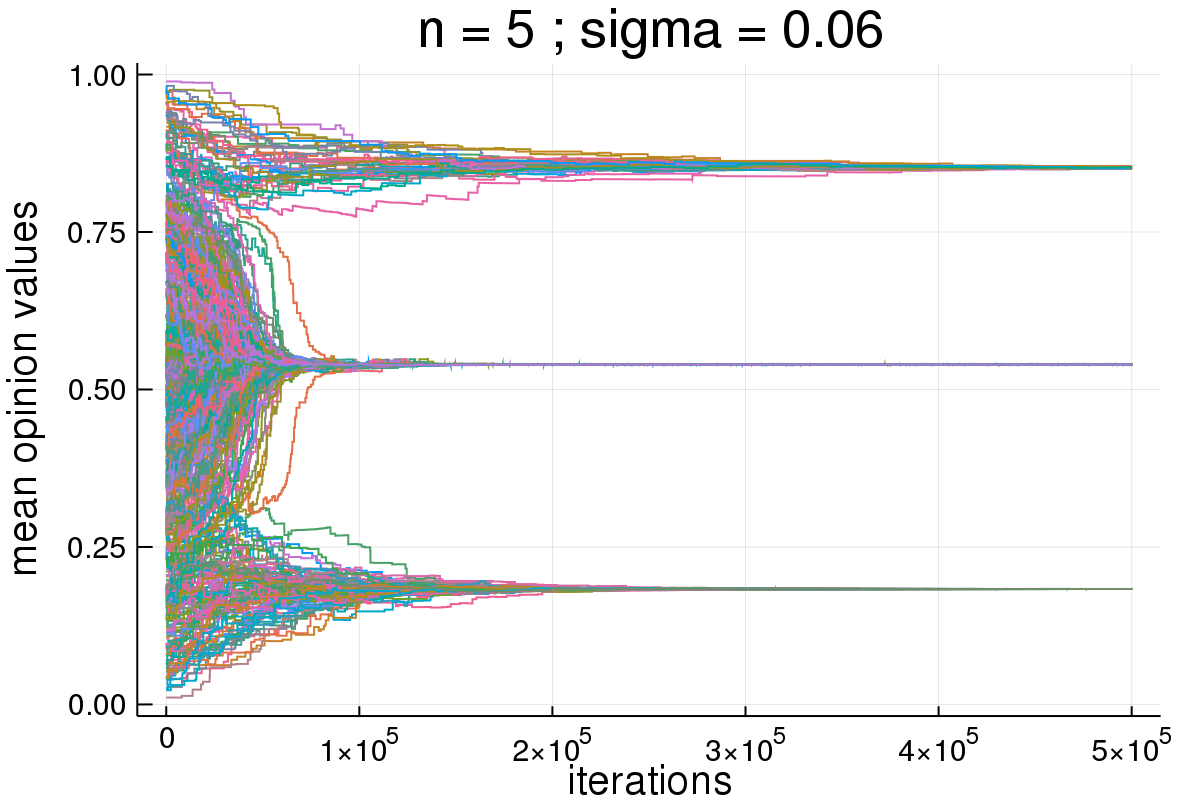

In [14]:
displayimages(["compare-ps/Poodl.calculatep★n5-rho1.0e-5-sigma0.06-0.0intrans.png",
              "compare-ps/Poodl.calculatep★★★n5-rho1.0e-5-sigma0.06-0.0intrans.png"]);

Testamos simular por 1.000.000 de iterações as parametrizações dos 4 gráficos anteriores e a distinção de comportamento se manteve.


## Ver como explicar isso!!!! 

## Ver a discussão q faço mais ao fim da dissertação 

## sem o ruído, qual o papel do issue???   

$n =1 ; \rho = 1$   =>    $n = n ; \rho = \sqrt(n) * \rho_1 $

deixar mais clara a diferença entre os casos 